## cross 超参数混淆矩阵

In [1]:
# from Experiment.metric.ConfusionMatrix import CFMatrix
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
save_path = r'F:\研究生学习\自己的论文\第一篇\图\cross超参数\2yuan\p'
heads = [3, 6, 12, 24]
alphas = [5, 7, 9, 11]
pairs = []
for h in heads:
    for a in alphas:
        pairs.append((h, a))
pairs

In [ ]:
# 取100-120
import os
for i in range(1, 17):#17):
    file_path = r'E:\DATABASE\FirstGNN\220913_exp\Cross\m7_'+f'{i}'+r'\flowrecorder.json'
    with open(file_path, 'r', encoding='utf-8') as f:
        ret_dic = json.load(f)
    fig, ax = plt.subplots(dpi=200)
    log = []
    lb = []
    for j in range(100, 120):
        log.extend(ret_dic[f'{j}-th']['logits'][1:])
        lb.extend(ret_dic[f'{j}-th']['labels'][1:])
    # print(log[:10], lb[:10])
    CFMatrix(log, lb, fig, ax)
    # os.system("pause")
    plt.savefig(save_path+f'h{pairs[i-1][0]}_tr{pairs[i-1][1]}')

## 超参数 acc 分布


### ceshi

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [2]:
# d = [] # <k, v> = i, [ave, var]
ave = []
var = []
for i in range(1, 17):#17):
    file_path = r'E:\DATABASE\FirstGNN\220913_exp\Cross\m7_'+f'{i}'+r'\flowrecorder.json'
    with open(file_path, 'r', encoding='utf-8') as f:
        ret_dic = json.load(f)
    # fig, ax = plt.subplots(dpi=200)
    acc = []
    for j in range(100, 120):
        acc.append(ret_dic[f'{j}-th']['ave_ts_acc'])
    ave.append(np.mean(acc))
    var.append(np.var(acc))

In [3]:
def norm(data):
    mini = min(data)
    maxi = max(data)
    return (data - mini)/(maxi - mini)
def softmax(data):
    return np.exp(data)/sum(np.exp(data))


In [4]:
v = norm(var)
v

array([0.49714018, 0.34723067, 0.40882504, 0.25826989, 0.72081724,
       0.62764245, 0.46817654, 0.19036658, 0.        , 0.21282211,
       0.40969117, 0.29623399, 0.29329934, 1.        , 0.2241364 ,
       0.37680009])

In [31]:
class Circle1():
    def __init__(self) -> None:
        a_x = np.arange(0, 2*np.pi, 0.01)
        self.a = np.cos(a_x)
        self.b = np.sin(a_x)
    
    def plot(self, o, r, ax):
        x, y = o[0], o[1]
        if r <= 0.01:
            r = 0.01
        a = x+r*self.a
        b = y+r*self.b
        ax.plot(a, b, color='r')
        # ax.plot(a, -b, color='r')

(-1.0, 3.0)

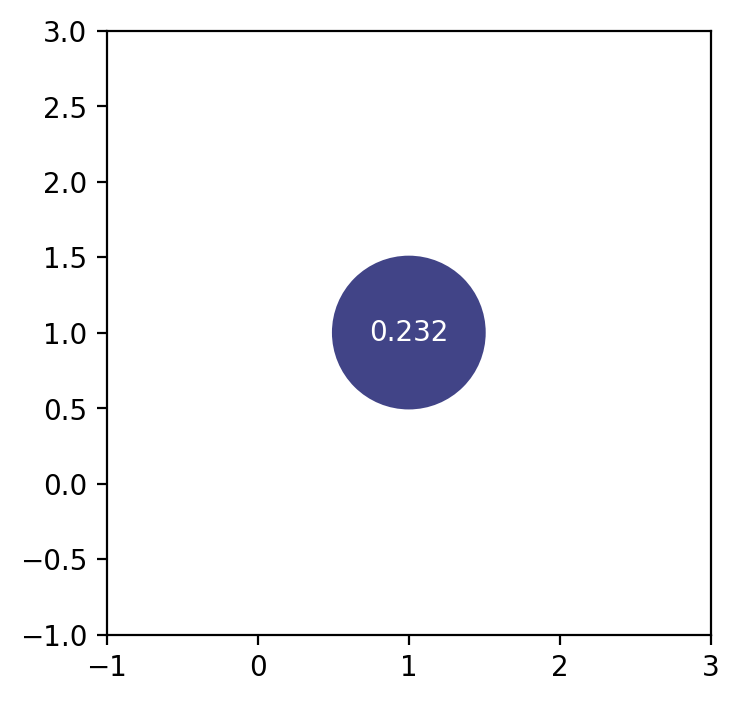

In [13]:
from matplotlib.patches import Circle
from matplotlib.colors import Colormap
fig, ax = plt.subplots(dpi=200)
# ax.figure(figsize = (4,4), dpi=200)
# plt.figure(figsize = (4,4))
ax.set_aspect('equal')
cm1 = 0
x, y = 1, 1
acc_p = 0.232
c = Circle((x,y), 0.5, color = plt.get_cmap('viridis')(0.2))
t = plt.text(x, y, s=f'{acc_p}', c = 'w', ha = 'center', va='center')
ax.add_patch(c)
ax.set_xlim(-1,3)
ax.set_ylim(-1,3)

In [7]:
## 可行方法
## 因为 Colormap 是抽象类，需要传导get/set上，进行实例化以后才可以使用
# mpl.cm.get_cmap('viridis')(0.1)
# plt.get_cmap('viridis')()

(0.282623, 0.140926, 0.457517, 1.0)

## yunxing

In [ ]:
def norm(data):
    mini = min(data)
    maxi = max(data)
    return (data - mini)/(maxi - mini)
def softmax(data):
    return np.exp(data)/sum(np.exp(data))

In [49]:
from matplotlib.patches import Circle
def acc_pie(x, y, acc, var, ax):
    if var < 0.02:
        var = 0.02
    var /= 2
    c = Circle((x,y), var, color = plt.get_cmap('YlOrRd')((acc-0.15)*15))
    t = plt.text(x, y, s=f'{acc:.2f}', c = 'black', ha = 'center', va='center',
                fontsize=5)
    ax.add_patch(c)


In [ ]:
ave = []
var = []
for i in range(1, 17):#17):
    file_path = r'E:\DATABASE\FirstGNN\220913_exp\Cross\m7_'+f'{i}'+r'\flowrecorder.json'
    with open(file_path, 'r', encoding='utf-8') as f:
        ret_dic = json.load(f)
    # fig, ax = plt.subplots(dpi=200)
    acc = []
    for j in range(100, 120):
        acc.append(ret_dic[f'{j}-th']['ave_ts_acc'])
    ave.append(np.mean(acc))
    var.append(np.var(acc))

v = norm(var)
v

D:\Temp/ipykernel_10548/724364756.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(heads)
D:\Temp/ipykernel_10548/724364756.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(alphas)


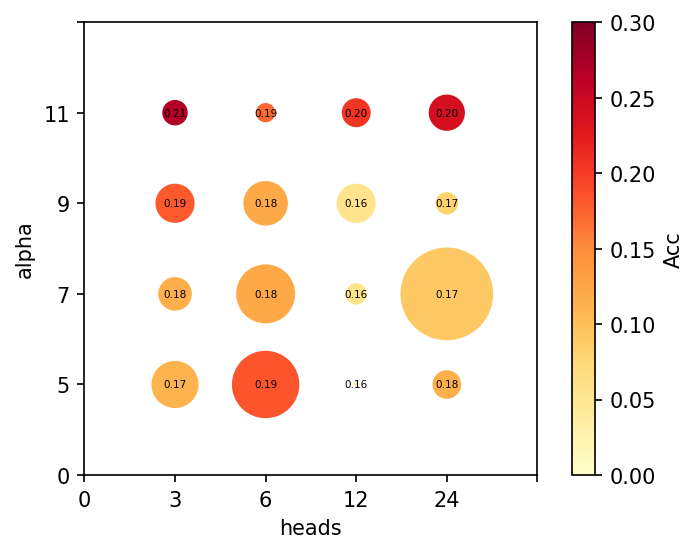

In [61]:
fig, ax = plt.subplots(dpi=150)
heads = [0, 3, 6, 12, 24]
alphas = [0, 5, 7, 9, 11]
pairs = []
for i in range(1, 5): # head
    for j in range(1, 5): # al
        pairs.append((i,j))
        
for i in range(16):
    acc_pie(pairs[i][0], pairs[i][1], ave[i], v[i], ax)

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_aspect('equal')
ax.set_xticklabels(heads)
ax.set_yticklabels(alphas)
ax.set_ylabel('alpha')
ax.set_xlabel('heads')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=0.3))
plt.colorbar(sm, label='Acc')

In [57]:
type(ax)

matplotlib.axes._subplots.AxesSubplot